<a href="https://colab.research.google.com/github/pavansai26/DIFERENCE-BETWEEN-TSNE-AND-MULTICORE-TSNE/blob/master/TSNE_VS_MULTICORE_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
sns.set(context='notebook',rc={'figure.figsize':(12,10)})

# **importing the tsne from sklearn**

In [4]:
from sklearn.manifold import TSNE

# **installing multicore tsne**

In [2]:
pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68503 sha256=b803cc9580522bf757e1ed9dc2e67b81097a32cbe435b6675c2f3895f3822f6c
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


# **importing the multicore tsne**

In [5]:
from MulticoreTSNE import MulticoreTSNE as tsne

# **loading the digits dataset**

In [6]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

# **visualizing the 100 images**

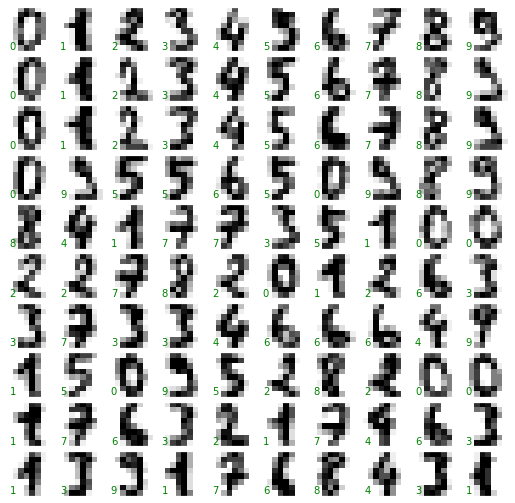

In [7]:
fig,ax =plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,axes in enumerate(ax.flat):
  axes.imshow(digits.images[i],cmap='binary')
  axes.text(0.05,0.05,str(digits.target[i]),transform=axes.transAxes,color='green')

# **fitting the TSNE model**

In [9]:
%time embeddings_tsne = TSNE(n_components=2).fit_transform(digits.data)

CPU times: user 28.5 s, sys: 128 ms, total: 28.7 s
Wall time: 14.9 s


# **visualizing the TSNE model**

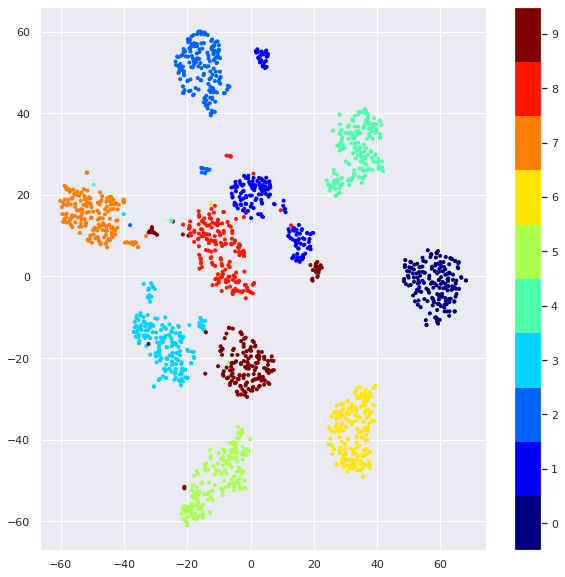

In [10]:
plt.figure(figsize=(10,10))
vis_x = embeddings_tsne[:, 0]
vis_y = embeddings_tsne[:, 1]
plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

# **fitting the multicore TSNE model**

In [12]:
%time embeddings_multi = tsne(n_jobs=-1).fit_transform(digits.data)

CPU times: user 17.9 s, sys: 31.8 ms, total: 17.9 s
Wall time: 9.65 s


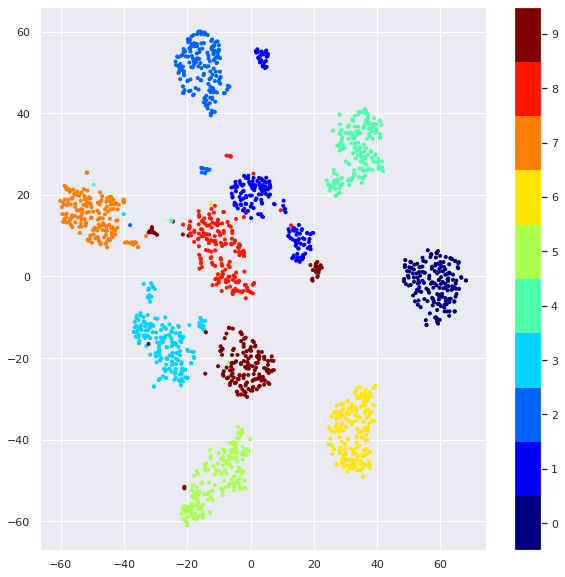

In [26]:
plt.figure(figsize=(10,10))
vis_x1 = embeddings_multi[:, 0]
vis_y1 = embeddings_multi[:, 1]
plt.scatter(vis_x, vis_y, c=digits.target, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()